plasticity parameters have a value per region: True True
 shape inhibitory rates returned: (90, 50000)
 shape excitatory rates returned: (90, 50000)


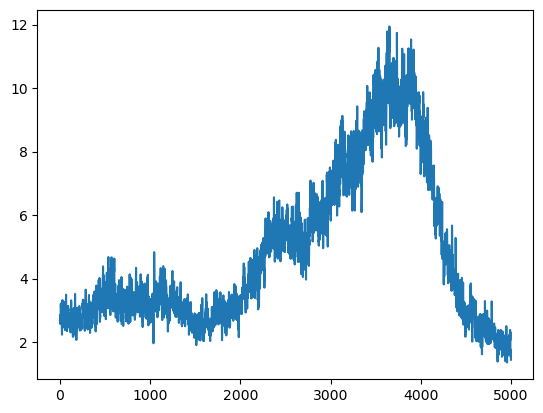

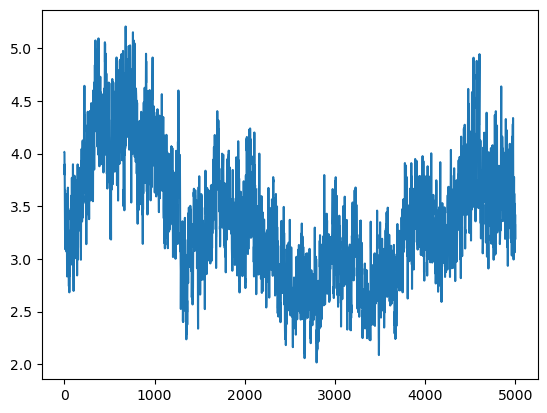

In [1]:
import fastdyn_fic_dmf as dmf
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

C = np.loadtxt('../data/SCs/Averaged_SCs/aal/healthy_average.csv',delimiter=',')
C = 0.2*C/np.max(C) # in this normalization theres a critical point at g=2.5
N = C.shape[0]
# Homeostatic parameters depend on the objective rate
obj_rate = 3.44
# We have pre-computed the a,b coefficients for objective rates 3.44 
if obj_rate == 3.44:
    fit_res = np.load("../data/LinearCoeffs/Averaged_SCs/aal_fit_res_3-44.npy")
    b = fit_res[0] # First element is the slope
    a = fit_res[1]
else:
    # Throw an exception stating that you need to calculate a,b coefficients for the desired objective rate and connnectivity
    Exception("Need to calculate a,b coefficients for the desired objective rate")    
LR = 3.5 * np.ones(N)
# We use the a,b coefficients to calculate the decay
DECAY = np.exp(a+np.log(LR)*b)
params = dmf.default_params(C=C, lrj = LR, taoj = DECAY)

params["obj_rate"] = obj_rate
# To explore the effect of the decay this can be turned off
# In general, if we want plasticity we use both set decay and plasticity as True
params["with_decay"] = True
params["with_plasticity"] = True
# To allow for heterogeneities in the decay and learning rate we  set them as vectors
#params['lrj'] = LR
#params['taoj'] = DECAY
print("plasticity parameters have a value per region:", len(params['lrj'])==C.shape[0], len(params['taoj'])==C.shape[0])

# Set the global coupling strength
G_VAL = 3.5
params['G'] = G_VAL
# We use the linear solution from fastDMF paper to initialize FIC values
params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1

# Short simulation
nb_steps = 50000
params['seed'] = 1

# Assume you want everyhing returned
params["return_bold"] = True
params["return_fic"] = True
params["return_rate"] = True
params["return_rate_inh"] = False # this way we also see the effect of inhibitory rates
# If not it will return the last batch of values calcualted

rates_dyn, rates_inh_dyn, bold_dyn, fic_t_dyn = dmf.run(params, 50000)


print(f" shape inhibitory rates returned: {rates_inh_dyn.shape}")
print(f" shape excitatory rates returned: {rates_dyn.shape}")
plt.plot(rates_dyn.mean(axis=0)[int(params['burnout']/params['dtt'])+4000:14000])
plt.show()

params["with_decay"] = False
params["with_plasticity"] = False

G_VAL = 2.5
params['G'] = G_VAL
params['J'] = 0.75*params['G']*params['C'].sum(axis=0).squeeze() + 1
rates_static, rates_inh_static, bold_static, fic_t_static = dmf.run(params, 50000)

plt.plot(rates_static.mean(axis=0)[int(params['burnout']/params['dtt']):10000])
plt.show()

## with config based pipeline

In [2]:
import numpy as np

import sys
from pathlib import Path

# Add project paths
project_root = Path.cwd().parent


# Import experiment management from HDMF src folder
from fastHDMF.simulation_runner import HDMFSimulationRunner
from fastHDMF.experiment_manager import ExperimentManager
from fastHDMF.utils.data_loading import load_all_sc_matrices

In [3]:
exp = ExperimentManager(project_root=project_root, experiment_id="Default", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
runner = HDMFSimulationRunner(exp)
res = runner.run_experiment()

In [4]:
exp = ExperimentManager(project_root=project_root, experiment_id="Repeat_Example", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
runner = HDMFSimulationRunner(exp)
res = runner.run_experiment()

In [5]:
exp = ExperimentManager(project_root=project_root, experiment_id="Grid_Example", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
runner = HDMFSimulationRunner(exp)
res = runner.run_experiment()